# Here will get the percentages of each parcel to every network

""""""


Network 1 = Visual

Network 2 = Somatomotor

Network 3 = Dorsal Attention

Network 4 = Ventral Attention

Network 5 = Limbic

Network 6 = Frontoparietal

Network 7 = DMN


""""""

In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import os
import numpy as np
import jedi
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
rootpath="/Users/stavrostrakoshis/Desktop/HCP_yeo"
datapath=os.path.join(rootpath, "output")

parce_num_name_path="GlasserHCP_annot.txt"

In [4]:
#read inn regions networks txts
dfnet1=pd.read_csv(os.path.join(datapath, "HCP_Regions_in_Network1.txt"), sep=" ", header=None)
dfnet2=pd.read_csv(os.path.join(datapath, "HCP_Regions_in_Network2.txt"), sep=" ", header=None)
dfnet3=pd.read_csv(os.path.join(datapath, "HCP_Regions_in_Network3.txt"), sep=" ", header=None)
dfnet4=pd.read_csv(os.path.join(datapath, "HCP_Regions_in_Network4.txt"), sep=" ", header=None)
dfnet5=pd.read_csv(os.path.join(datapath, "HCP_Regions_in_Network5.txt"), sep=" ", header=None)
dfnet6=pd.read_csv(os.path.join(datapath, "HCP_Regions_in_Network6.txt"), sep=" ", header=None)
dfnet7=pd.read_csv(os.path.join(datapath, "HCP_Regions_in_Network7.txt"), sep=" ", header=None)


In [5]:
#read in annotations txt
anot=pd.read_csv(os.path.join(rootpath, parce_num_name_path), sep="\t", header=0)

In [6]:
def get_percentages(df, outname):
    tmp_total=len(df)
    region_num=180
    out_=pd.DataFrame(data=np.zeros((region_num, 3)),
                      columns=["Parcel", "Total_count", "Percentage_of_total"])

    working_lst=list(df.values)

    for i in np.arange(1,180,1):

        tmp_result=working_lst.count(i) #list method coount does the job
#         print(i, "Exist", tmp_result)
#         print("\n")

        tmp_percentage=(tmp_result/tmp_total) * 100
#         print(i, "Percentage on network is", tmp_percentage)
#         print("\n")
#         print("\n")
        #
        #fill output

        out_.iloc[i, 0]=i
        out_.iloc[i, 1]=tmp_result
        out_.iloc[i, 2]=tmp_percentage
    
    out_.to_csv(os.path.join(datapath, outname))
    print(out_)
    return out_
    
    

In [7]:
per_dfnet1=get_percentages(dfnet1, "Network1_percentages.csv")
per_dfnet2=get_percentages(dfnet2, "Network2_percentages.csv")
per_dfnet3=get_percentages(dfnet3, "Network3_percentages.csv")
per_dfnet4=get_percentages(dfnet4, "Network4_percentages.csv")
per_dfnet5=get_percentages(dfnet5, "Network5_percentages.csv")
per_dfnet6=get_percentages(dfnet6, "Network6_percentages.csv")
per_dfnet7=get_percentages(dfnet7, "Network7_percentages.csv")

     Parcel  Total_count  Percentage_of_total
0       0.0          0.0             0.000000
1       1.0      27798.0            12.870875
2       2.0        930.0             0.430603
3       3.0       5724.0             2.650294
4       4.0      24378.0            11.287365
..      ...          ...                  ...
175   175.0          0.0             0.000000
176   176.0          0.0             0.000000
177   177.0          0.0             0.000000
178   178.0          0.0             0.000000
179   179.0          0.0             0.000000

[180 rows x 3 columns]
     Parcel  Total_count  Percentage_of_total
0       0.0          0.0             0.000000
1       1.0          0.0             0.000000
2       2.0          0.0             0.000000
3       3.0          0.0             0.000000
4       4.0          0.0             0.000000
..      ...          ...                  ...
175   175.0      15840.0             6.887555
176   176.0          0.0             0.000000
177   177.

In [8]:

per_dfnet1["area"]=anot["area"]
per_dfnet1["area_descrip"]=anot["area_descrip"]

per_dfnet2["area"]=anot["area"]
per_dfnet2["area_descrip"]=anot["area_descrip"]

per_dfnet3["area"]=anot["area"]
per_dfnet3["area_descrip"]=anot["area_descrip"]

per_dfnet4["area"]=anot["area"]
per_dfnet4["area_descrip"]=anot["area_descrip"]

per_dfnet5["area"]=anot["area"]
per_dfnet5["area_descrip"]=anot["area_descrip"]

per_dfnet6["area"]=anot["area"]
per_dfnet6["area_descrip"]=anot["area_descrip"]

per_dfnet7["area"]=anot["area"]
per_dfnet7["area_descrip"]=anot["area_descrip"]

In [9]:
interaction_effect_areas=["p32", "p47r", "FEF", "V3", "LIPv", "OP4",
                          "VMV1", "3a", "STSva", "STSvp"]

DX_main_areas=["PEF","55b", "23c", "p32pr","10r","9m","8C","44","6r","IFJa",
               "IFJp", "IFSp", "46" ,"a9-46v","9-46d", "FOP2", "FOP5","PHA3","a32pr", "V1","V6","V8", 
               "V7","4", "IPS1","V3B","LO2","MT","5mv","LIPv","3a","3b","MIP",
               "d32","LIPd","OP1","PFt","AIP","DVT","IP0", "IP1", "IP2", "VMV1", "V4t", "VVC",
              "MST","OP2-3","RI","STSda","STSdp","STSva","TE2p","PHT","TPOJ1","TPOJ2",
               "TPOJ3","FST"]

In [10]:
# Check for correctness

In [11]:
isinlst=per_dfnet1["area"].isin(interaction_effect_areas)

out__ = list()
for i in isinlst:
    if i == True:
        out__.append(i)

len(out__) == len(interaction_effect_areas)

True

In [12]:
isinlst=per_dfnet1["area"].isin(DX_main_areas)

out__ = list()
for i in isinlst:
#     print(i)
    if i == True:
        out__.append(i)

print(len(out__) == len(DX_main_areas))
# print(len(out__))
# print(len(DX_main_areas))

True


# Start Data Visualization Function

In [49]:
def net_percent_plot(per_df, netnum, effect, i_m,transpose=False):
    font=14

    per_df.index=per_df["area"]
    
    if i_m==1:
        interaction_perc_net=per_df.loc[per_df["area"].isin(interaction_effect_areas)]["Percentage_of_total"]
    elif i_m==2:
        interaction_perc_net=per_df.loc[per_df["area"].isin(DX_main_areas)]["Percentage_of_total"]
    if transpose==False:
        interaction_perc_net.plot(kind="bar")
        plt.title("Percentages of regions that appear on a Yeo Network %i" %(netnum), fontsize=14)
        plt.xlabel("Regions with an %s effect" %(effect), fontsize=font)
        plt.ylabel("Percentage (out of total regions in network)", fontsize=font)
        plt.xticks(fontsize=font)
    elif transpose==True:
        interaction_perc_net.plot.barh()
        plt.title("Percentages of regions that appear on a Yeo Network %i" %(netnum), fontsize=14)
        plt.ylabel("Regions with an %s effect" %(effect), fontsize=font) #
        plt.xlabel("Percentage (out of total regions in network)", fontsize=font) #
        plt.xticks(fontsize=font)

    
    
    plt.savefig(os.path.join(rootpath, "Network_%i_percentages_for_%s.png" %(netnum, effect)))
    
    
    print("SUM IS :",np.sum(interaction_perc_net))
    print("MAX IS :",np.max(interaction_perc_net))
            

## Interaction

### Network 1


SUM IS : 12.754194910545614
MAX IS : 11.287365262806977


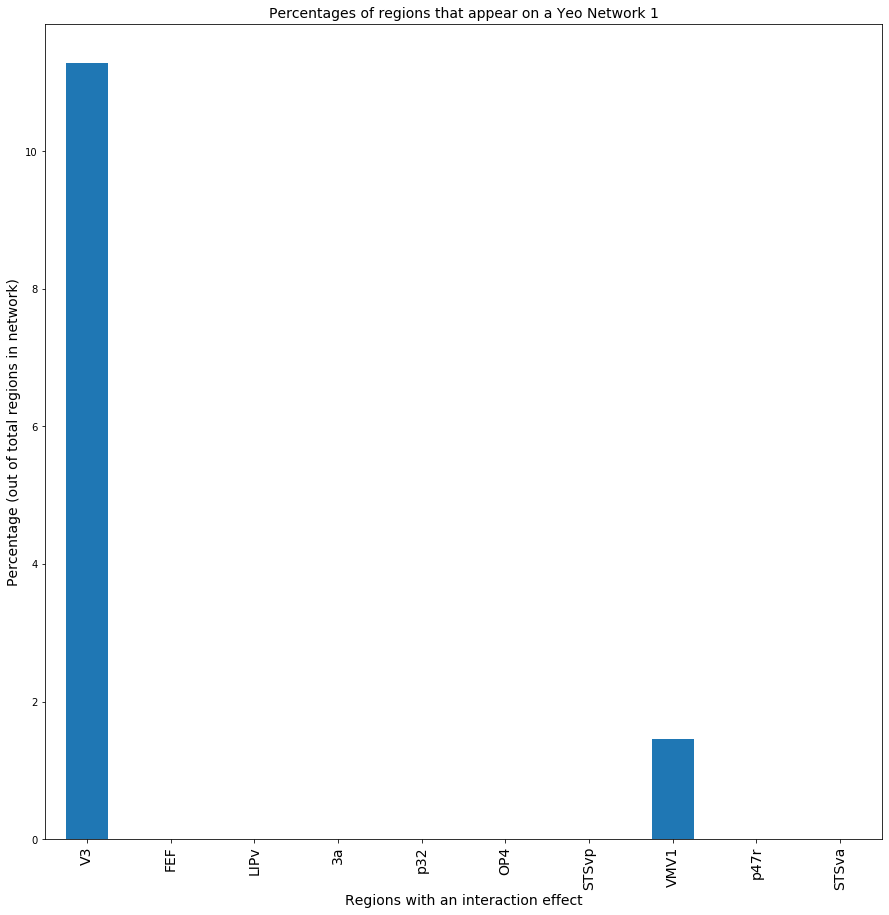

In [50]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet1, 1, "interaction", 1)

### Network 2

SUM IS : 16.712757631098356
MAX IS : 6.887555439603443


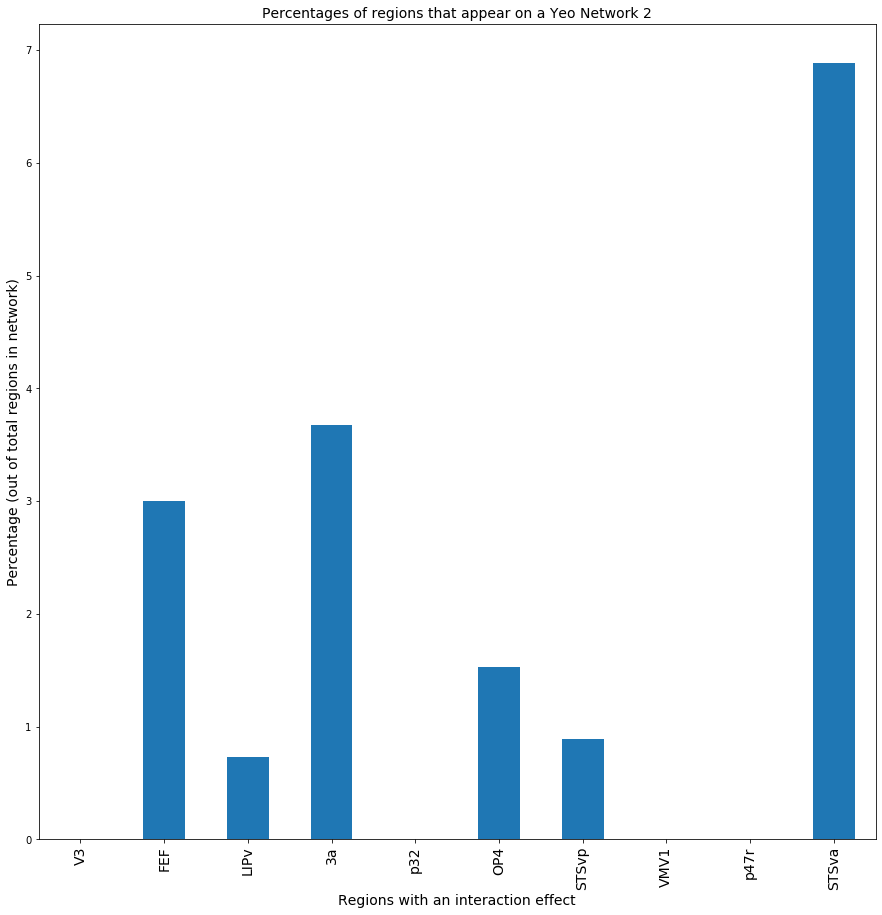

In [51]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet2, 2, "interaction", 1)

### Network 3

SUM IS : 5.234599425470795
MAX IS : 3.3641876795403767


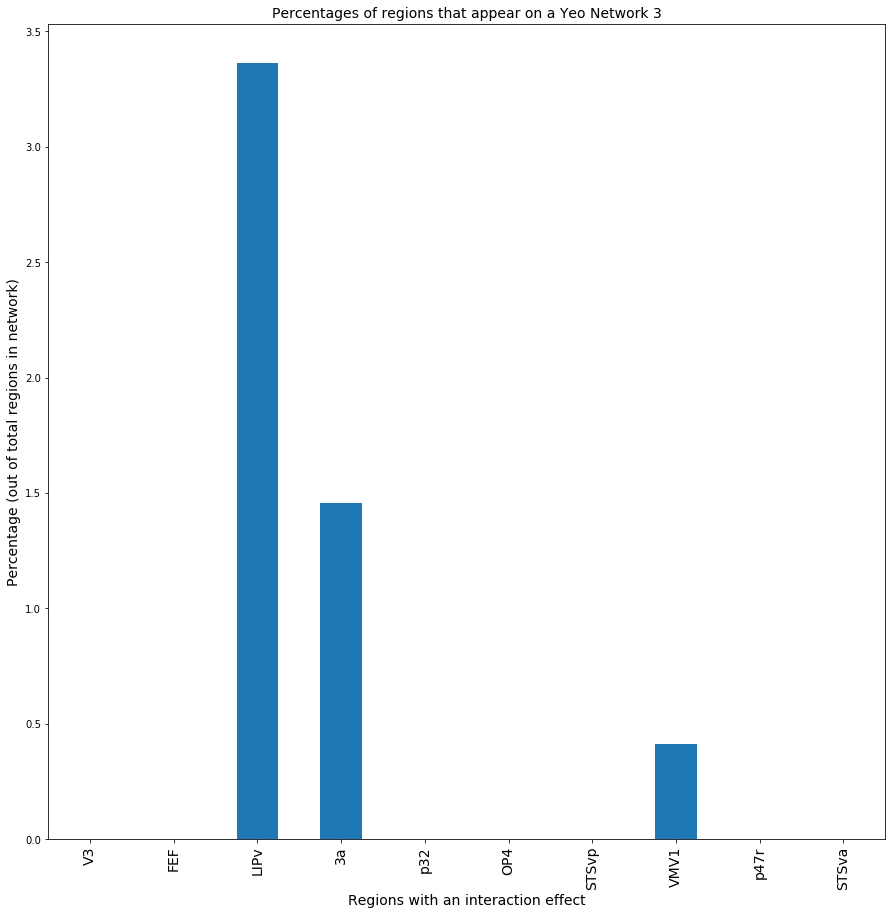

In [52]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet3, 3, "interaction", 1)

### Netwrok 4

SUM IS : 2.9237622645765198
MAX IS : 2.7856095635502425


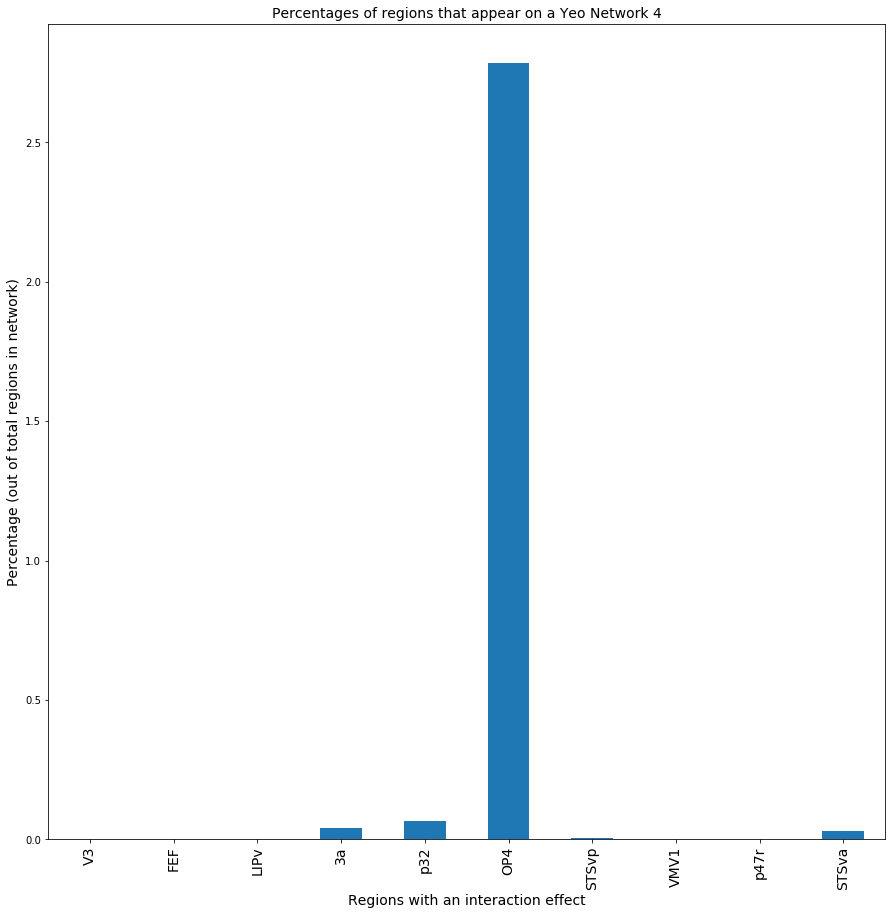

In [53]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet4, 4, "interaction", 1)

### Network 5

SUM IS : 0.2943438254090318
MAX IS : 0.2943438254090318


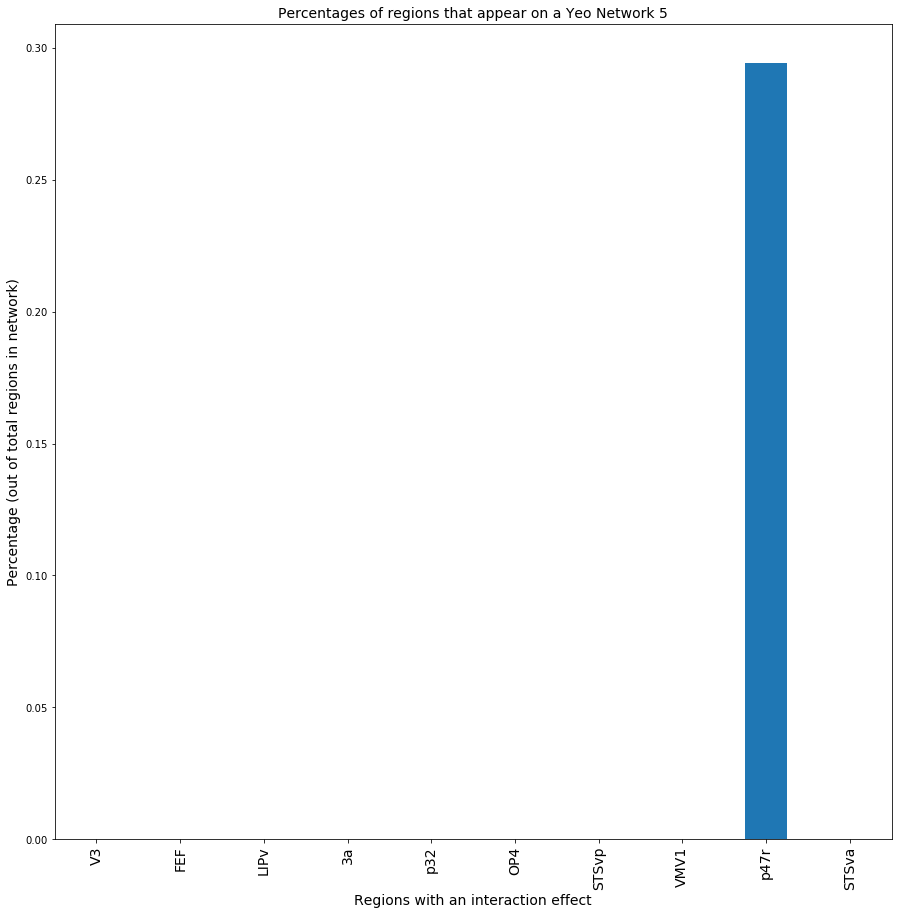

In [54]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet5, 5, "interaction", 1)

### Network 6

SUM IS : 5.294623565689832
MAX IS : 3.083635753393048


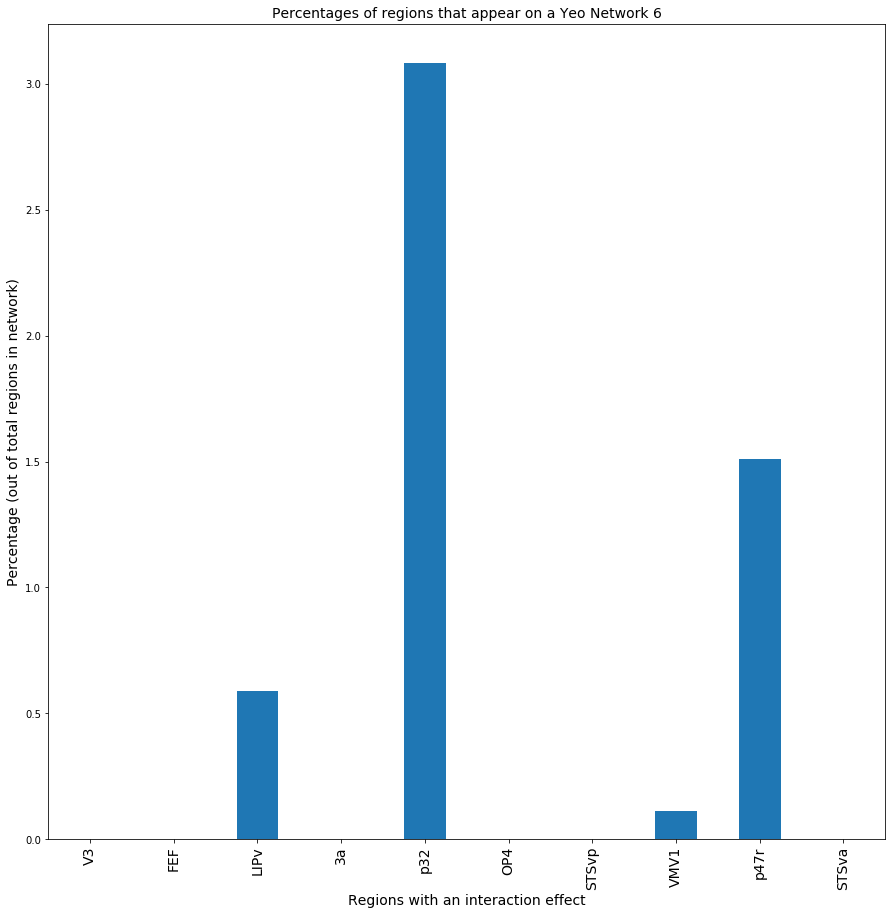

In [55]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet6, 6, "interaction", 1)

### Network 7

SUM IS : 3.7000550146492497
MAX IS : 1.6952188431570732


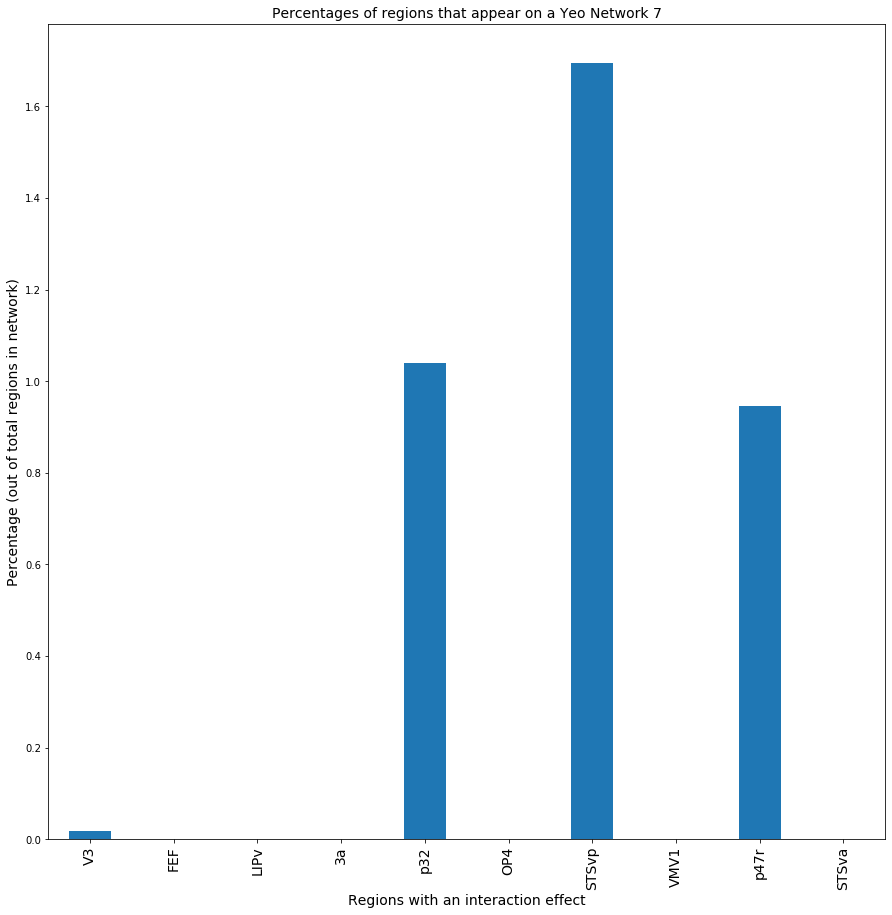

In [56]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet7,7, "interaction", 1)

## DX Main

### Network 1


SUM IS : 45.457828647627515
MAX IS : 12.870874541615734


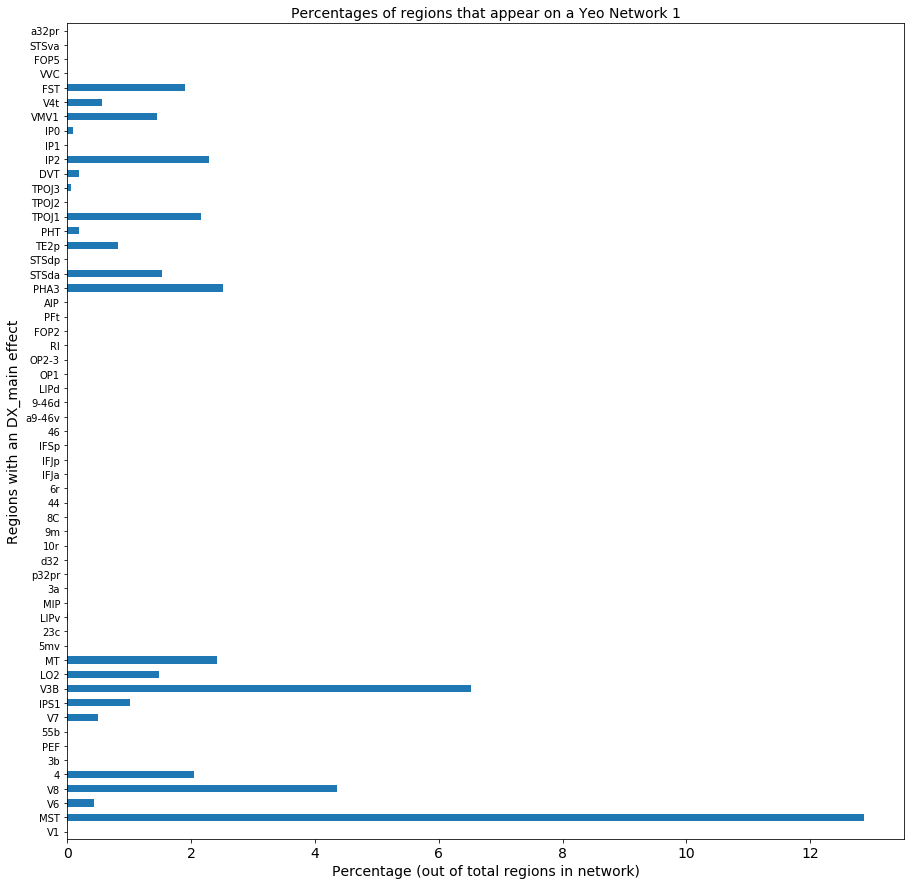

In [57]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet1, 1, "DX_main", 2, transpose=True)

### Network 2

SUM IS : 37.11714062092356
MAX IS : 9.613879467779807


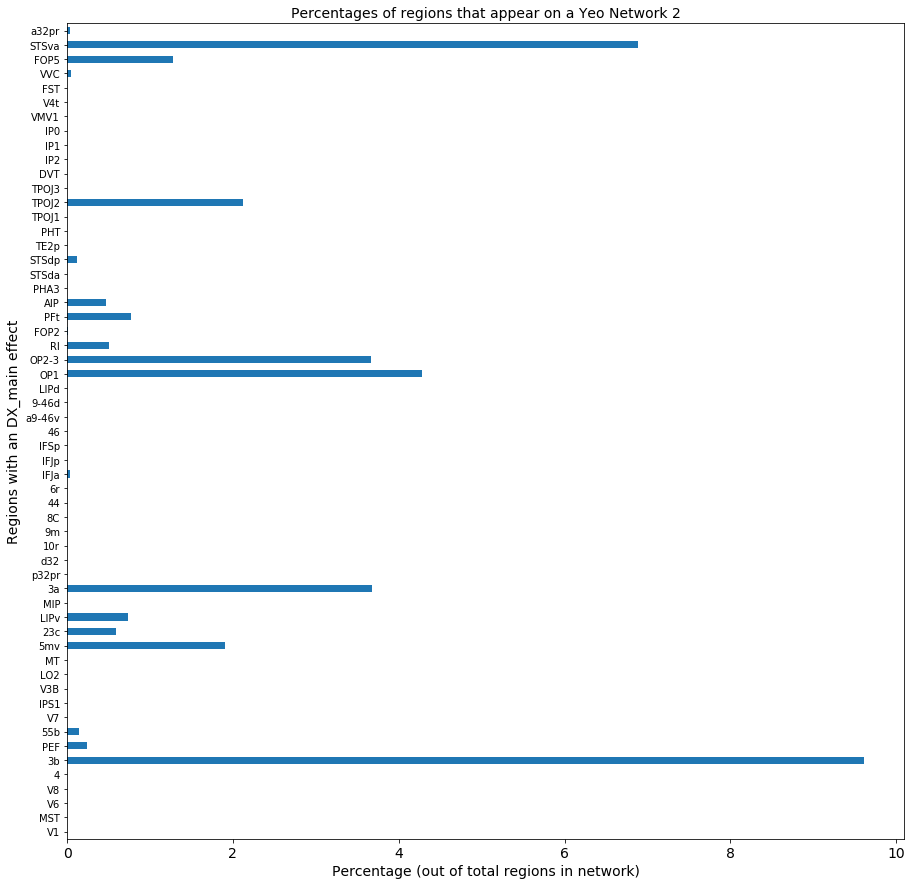

In [58]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet2, 2, "DX_main", 2, transpose=True)

### Network 3

SUM IS : 46.042132141717204
MAX IS : 5.400574529205235


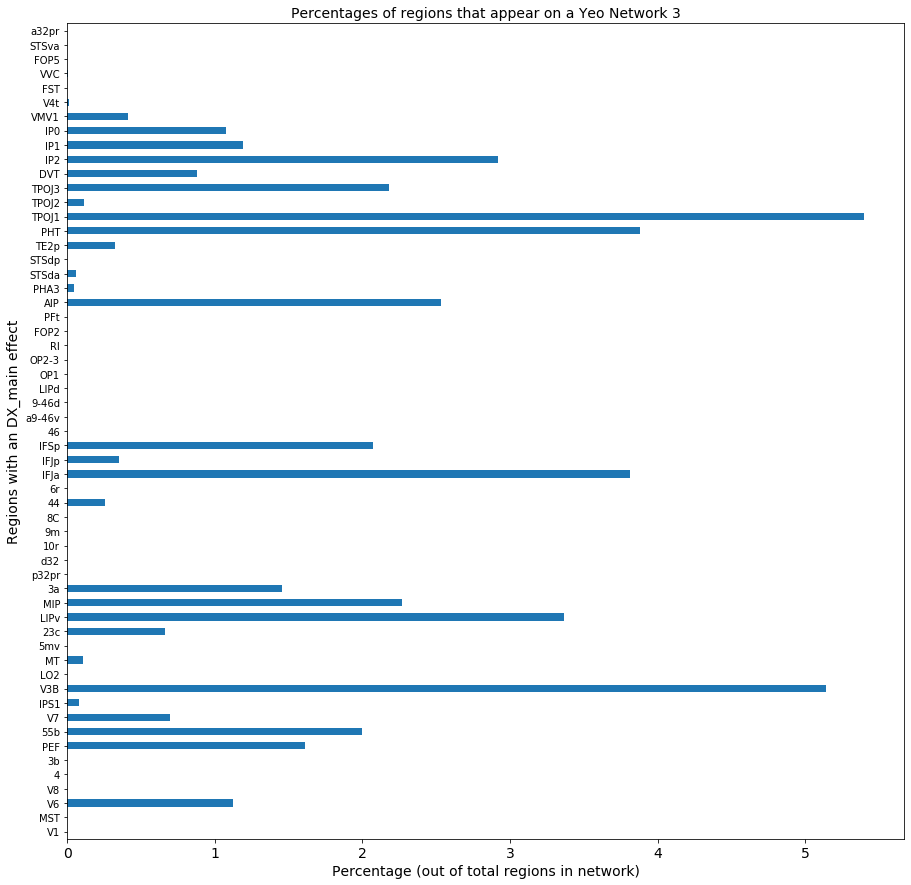

In [59]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet3, 3, "DX_main", 2, transpose=True)

### Netwrok 4

SUM IS : 18.7887673395737
MAX IS : 4.350400360888688


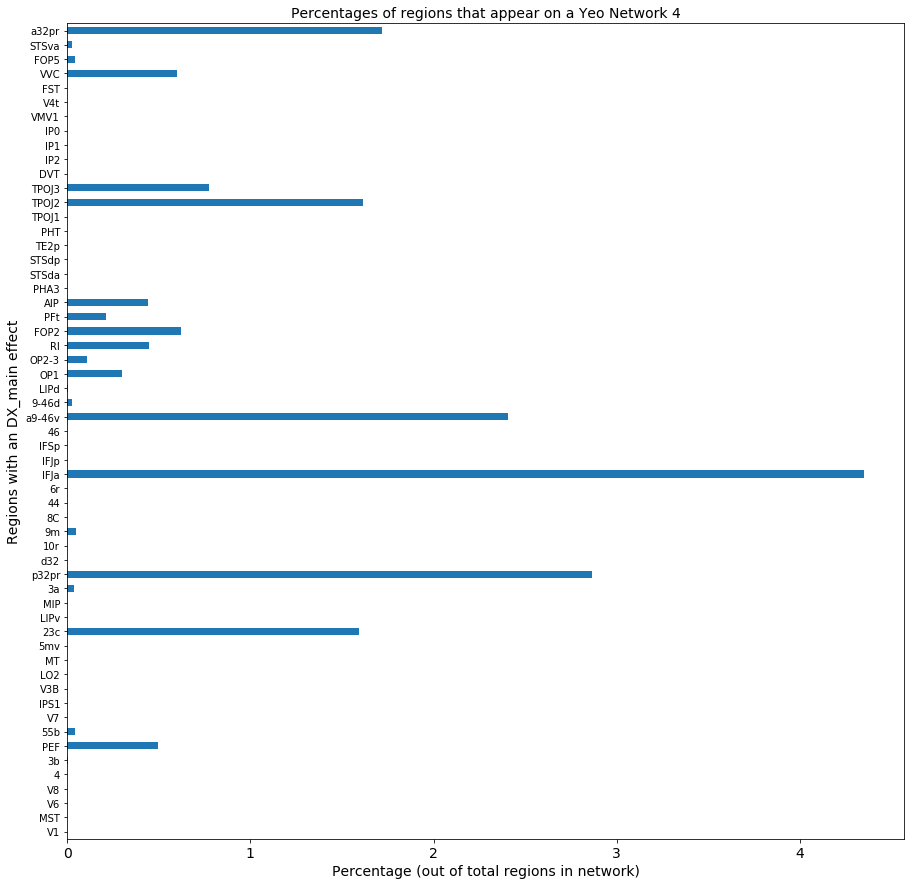

In [60]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet4, 4, "DX_main", 2, transpose=True)

### Network 5

SUM IS : 14.767574447773859
MAX IS : 6.865370846702554


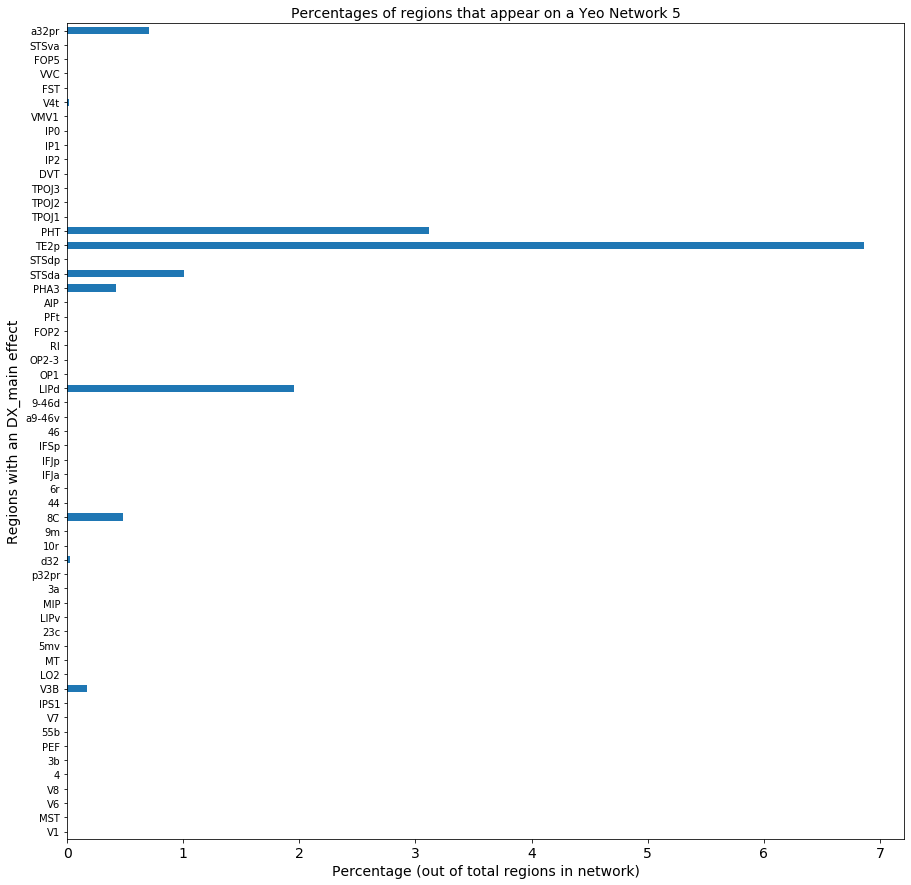

In [61]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet5, 5, "DX_main", 2, transpose=True)

### Network 6

SUM IS : 33.05573619181473
MAX IS : 5.640745946172725


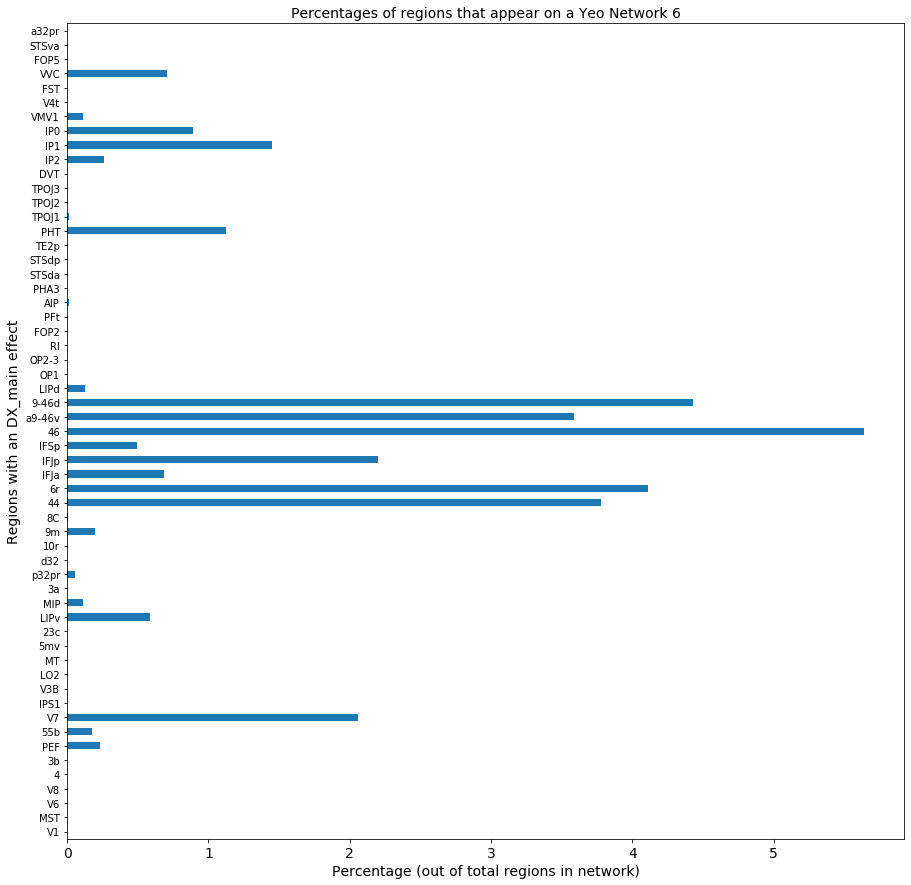

In [62]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet6, 6, "DX_main", 2, transpose=True)

### Network 7

SUM IS : 17.375673289748082
MAX IS : 2.867158813218869


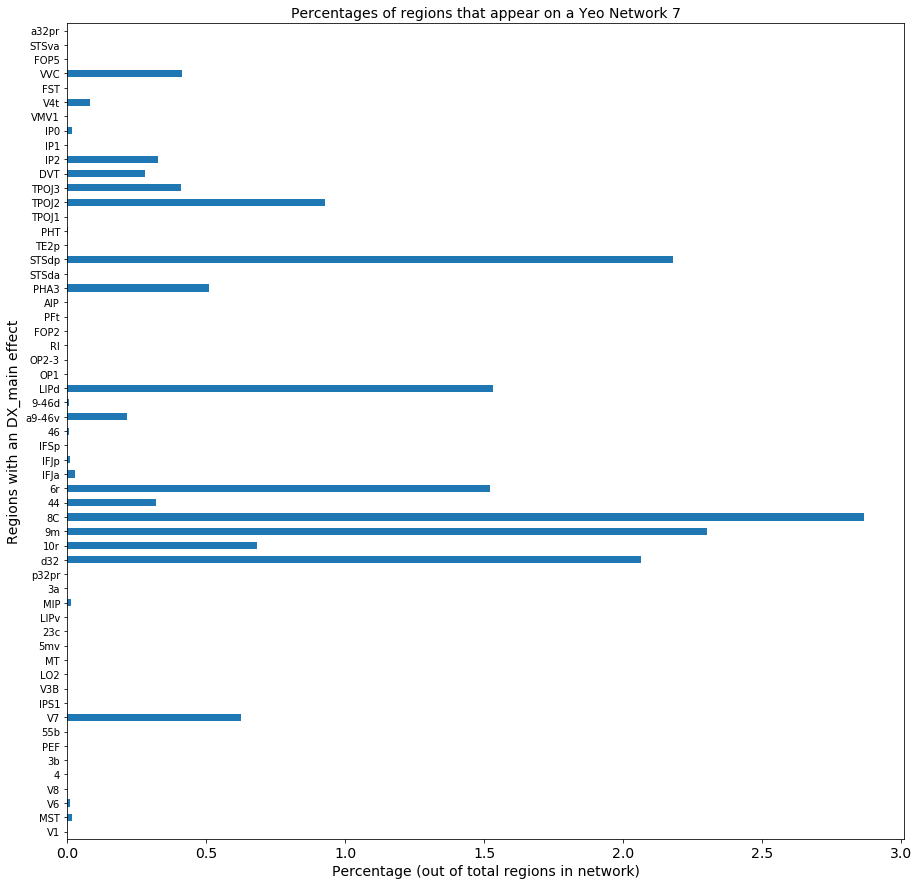

In [63]:
plt.figure(figsize=(15,15))
net_percent_plot(per_dfnet7, 7, "DX_main", 2, transpose=True)